#DeepLearning with Pytorch
##第一章 线性回归问题
***
  Please see 01~03.py in cuurrent dirctory

##第二章 基础张量操作
*************************************************

In [ ]:
! nvidia-smi
! pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html
! pip install pytorch-nlp
! pip install numpy

Tue Jul 28 08:19:12 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
from torch.nn import functional as F

1.4.0


In [ ]:
a=torch.randn(2,3)
print(a)
a.type()
# =print(type(a))

tensor([[-0.2114, -0.1883,  0.6459],
        [-0.3913, -1.6867,  0.7907]])


'torch.FloatTensor'

In [ ]:
data=a.cuda()
print(data)

tensor([[ 0.6300,  0.8824, -2.0275],
        [-0.5132, -0.5877, -0.2855]], device='cuda:0')


In [ ]:
isinstance(data, torch.cuda.DoubleTensor)

False

初始化张量

In [ ]:
torch.tensor(1.)

tensor(1.)

In [ ]:
torch.tensor(1.3)

tensor(1.3000)

In [ ]:
a = torch.tensor(2.2)
a.shape

torch.Size([])

In [ ]:
a.dim()

0

In [ ]:
a.size()

torch.Size([])

In [ ]:
torch.tensor([1.1])

tensor([1.1000])

In [ ]:
torch.tensor([1.1, 2.2])

tensor([1.1000, 2.2000])

生成一个大小为1的张量

In [ ]:
torch.FloatTensor(1)
# torch.FloatTensor(1).dim()

tensor([7.2244e+30])

In [ ]:
torch.FloatTensor(2)
# torch.FloatTensor(2).dim()

tensor([7.2244e+30, 0.0000e+00])

利用numpy生成的数组转换到Tensor,默认转换的类型是torch.float64

In [ ]:
data = np.ones(2)
data

array([1., 1.])

In [ ]:
torch.from_numpy(data)

tensor([1., 1.], dtype=torch.float64)

In [ ]:
a = torch.ones(2)
a.shape
# =a.size()

torch.Size([2])

In [ ]:
b = torch.ones([2,2])
b.size()

torch.Size([2, 2])

二维张量的初始化：CNN[b, c, h, w]

In [ ]:
a=torch.rand(2,3,28,28)
a

tensor([[[[2.9704e-01, 2.3542e-01, 1.0591e-01,  ..., 4.7948e-01,
           5.8760e-01, 7.0770e-01],
          [5.6007e-01, 6.1449e-01, 6.2274e-01,  ..., 7.8027e-01,
           7.0412e-01, 9.6025e-01],
          [5.9741e-01, 5.3127e-01, 1.1274e-01,  ..., 4.1381e-01,
           8.5088e-01, 8.3090e-01],
          ...,
          [7.3098e-01, 4.9054e-01, 5.7498e-01,  ..., 3.2850e-01,
           2.6765e-01, 2.1988e-01],
          [5.5350e-01, 7.0881e-01, 2.5856e-01,  ..., 6.1519e-01,
           9.0709e-01, 8.9420e-01],
          [3.7025e-01, 6.0015e-01, 1.4764e-01,  ..., 5.2724e-01,
           2.5791e-01, 6.4725e-01]],

         [[6.4309e-01, 3.5583e-01, 8.5795e-01,  ..., 7.8630e-01,
           6.4316e-01, 5.5858e-01],
          [3.2742e-02, 5.5398e-01, 3.6578e-01,  ..., 4.1093e-01,
           4.7032e-01, 9.4226e-01],
          [1.3226e-01, 8.4901e-01, 4.8744e-01,  ..., 7.1260e-01,
           2.3781e-01, 3.8140e-01],
          ...,
          [7.0101e-01, 5.3535e-01, 7.6685e-02,  ..., 8.9628

In [ ]:
a.shape

torch.Size([2, 3, 28, 28])

计算维度相乘的结果值

In [ ]:
a.numel()  # 2*3*28*28

4704

In [ ]:
a.dim()

4

In [ ]:
a = torch.tensor(1)
a.dim()

0

numpy数组格式到张量的转换

In [ ]:
a = np.ones([2,3])
torch.from_numpy(a)

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

直接导入数据的形式

In [ ]:
torch.tensor([2,3.2])

tensor([2.0000, 3.2000])

In [ ]:
torch.FloatTensor([2.,3.2])

tensor([2.0000, 3.2000])

In [ ]:
torch.tensor([[2.,3.2],[1.,22.369]])

tensor([[ 2.0000,  3.2000],
        [ 1.0000, 22.3690]])

FloatTensor().shape=Tensor().shape
torch.FloatTensor([1.,2])等于torch.tensor([1,2])

> eg.FloatTensor(d1, d2, d3, ...)


In [ ]:
torch.tensor([1.,2]).type()

'torch.FloatTensor'

In [ ]:
torch.FloatTensor([1,2]).type()

'torch.FloatTensor'

设置默认的tensor类型

In [ ]:
torch.tensor([1.2,3]).type()

'torch.FloatTensor'

In [ ]:
torch.set_default_tensor_type(torch.DoubleTensor)
torch.tensor([1.2, 3]).type()

'torch.DoubleTensor'

In [ ]:
torch.set_default_tensor_type(torch.FloatTensor)

非初始化（常作为容器）

In [ ]:
torch.empty([4])

tensor([7.2242e+30, 0.0000e+00, 1.4013e-45, 0.0000e+00])

随机初始化

In [ ]:
a = torch.rand(3,3)
a

tensor([[0.9011, 0.8601, 0.2973],
        [0.2281, 0.2255, 0.4309],
        [0.4006, 0.1671, 0.8156]])

In [ ]:
torch.rand_like(a)

tensor([[0.5017, 0.6769, 0.7992],
        [0.3946, 0.7590, 0.5065],
        [0.7182, 0.6728, 0.8172]])

使用randint:第一个参数是取值的最小范围，第二参数是取值的最大范围，第三参数是张量的大小

In [ ]:
torch.randint(1,10,[3,3])

tensor([[4, 5, 3],
        [4, 9, 8],
        [2, 3, 7]])

使用randn随机生成数据满足正态分布

In [ ]:
torch.randn(3,3)

tensor([[ 0.6060,  1.4445,  1.9861],
        [-0.3683,  0.6037,  0.0394],
        [ 1.3855, -1.3519,  1.3763]])

torch.normal(mean, std)
> mean = torch.full([10],0)==[0, 0, 0, 0, 0, 0 ,0, 0, 0, 0] 

> std = torch.arange(1, 0, -0.1)=[1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0]



In [ ]:
torch.normal(mean=torch.full([10],0),std=torch.arange(1,0,-0.1))

tensor([ 0.0352,  0.6182,  0.2655,  1.2579,  0.0743, -0.8461,  0.2521, -0.3889,
         0.0126, -0.1509])

torch.full()方法介绍

In [ ]:
torch.full([2,3],7)

tensor([[7., 7., 7.],
        [7., 7., 7.]])

生成标量

In [ ]:
torch.full([],7)

tensor(7.)

In [ ]:
torch.full([1],7)

tensor([7.])

torch.arange()函数介绍

In [ ]:
torch.arange(0,10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torch.arange(0, 10, 2)

tensor([0, 2, 4, 6, 8])

In [ ]:
torch.linspace(0,10,steps=4)

tensor([ 0.0000,  3.3333,  6.6667, 10.0000])

In [ ]:
torch.linspace(0,10,steps=10)

tensor([ 0.0000,  1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,
         8.8889, 10.0000])

In [ ]:
torch.linspace(0,10,steps=11)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
torch.logspace(0,-1,steps=10)

tensor([1.0000, 0.7743, 0.5995, 0.4642, 0.3594, 0.2783, 0.2154, 0.1668, 0.1292,
        0.1000])

In [ ]:
torch.logspace(0,1,steps=10)

tensor([ 1.0000,  1.2915,  1.6681,  2.1544,  2.7826,  3.5938,  4.6416,  5.9948,
         7.7426, 10.0000])

In [ ]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.zeros(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

torch.eye()函数只局限在一维和二维的情况下

In [ ]:
torch.eye(3,4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])

In [ ]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

torch.randperm(10)用于生成【0，10）的随机数（张量），可作为索引使用

In [ ]:
torch.randperm(10)

tensor([4, 9, 6, 5, 3, 7, 1, 2, 8, 0])

In [ ]:
a = torch.rand(2,3)
b = torch.rand(2,3)
a

tensor([[0.6026, 0.5685, 0.0796],
        [0.2108, 0.7262, 0.0768]])

In [ ]:
idx = torch.randperm(2)
idx

tensor([1, 0])

In [ ]:
a[idx]

tensor([[0.2108, 0.7262, 0.0768],
        [0.6026, 0.5685, 0.0796]])

In [ ]:
print(b)
b[idx]

tensor([[0.7532, 0.0672, 0.6638],
        [0.0387, 0.3450, 0.4530]])


tensor([[0.0387, 0.3450, 0.4530],
        [0.7532, 0.0672, 0.6638]])

In [ ]:
print(a,b)

tensor([[0.6026, 0.5685, 0.0796],
        [0.2108, 0.7262, 0.0768]]) tensor([[0.7532, 0.0672, 0.6638],
        [0.0387, 0.3450, 0.4530]])


torch符合所有numpy的切片操作

In [ ]:
a = torch.rand(4,3,28,28)
a[0].shape

torch.Size([3, 28, 28])

In [ ]:
a[0,0].shape

torch.Size([28, 28])

打印对应点的像素值

In [ ]:
a[0,0,2,4]

tensor(0.8289)

In [ ]:
a.shape

torch.Size([4, 3, 28, 28])

In [ ]:
print(a[:2].shape)
print(a[:2,:1,:,:].shape)
print(a[:2,1:,:,:].shape)
print(a[:2,-1:,:,:].shape)

torch.Size([2, 3, 28, 28])
torch.Size([2, 1, 28, 28])
torch.Size([2, 2, 28, 28])
torch.Size([2, 1, 28, 28])


In [ ]:
print(a[:,:,::2,::2].shape)
a[:,:,0:28:2,0:28:2].shape

torch.Size([4, 3, 14, 14])


torch.Size([4, 3, 14, 14])

index_select()函数中第一个参数是索引的对象，第二个参数0表示按行索引，1表示按列进行索引，第三个参数是一个tensor（不能直接使用list），就是索引的序号，比如a里面tensor[0，2]表示第0行和第2行

In [ ]:
print(a.index_select(0,torch.tensor([0, 2])).shape)
print(a.index_select(1,torch.tensor([1, 2])).shape)

torch.Size([2, 3, 28, 28])
torch.Size([4, 2, 28, 28])


In [ ]:
print(a.index_select(2,torch.arange(28)).shape)
print(a.index_select(2,torch.arange(8)).shape)

torch.Size([4, 3, 28, 28])
torch.Size([4, 3, 8, 28])


"..."代表任意多的维度

In [ ]:
print(a.shape)
print(a[...].shape)
print(a[0,...].shape)
print(a[:,1,...].shape)
a[...,:2].shape

torch.Size([4, 3, 28, 28])
torch.Size([4, 3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([4, 28, 28])


torch.Size([4, 3, 28, 2])

使用掩码进行索引：masked_select(),弊端是默认把张量展平
> ge=great equal: >=

In [ ]:
x = torch.randn(3,4)
x

tensor([[-0.5300,  0.4864, -1.9582, -0.7873],
        [-2.1667,  0.6529, -1.2520,  0.3300],
        [-1.2342,  0.6797, -0.1196, -0.1556]])

In [ ]:
mask = x.ge(0.5)
mask

tensor([[False, False, False, False],
        [False,  True, False, False],
        [False,  True, False, False]])

In [ ]:
print(torch.masked_select(x, mask))
torch.masked_select(x, mask).shape

tensor([0.6529, 0.6797])


torch.Size([2])

take虽然也能进行索引操作，但是会将所有的张量打平进行选取

In [ ]:
src = torch.tensor([[4,3,5],[6,7,8]])
src

tensor([[4, 3, 5],
        [6, 7, 8]])

In [ ]:
torch.take(src, torch.tensor([0,2,5]))

tensor([4, 5, 8])

Tensor的维度变换

>1.View/reshape
>2.Squeeze/Unsqueeze
>3.Transpose/permute
>4.Expand/repeat



In [ ]:
a = torch.rand(4,1,28,28)
a.shape

torch.Size([4, 1, 28, 28])

In [ ]:
print(a.view(4,28*28))
a.view(4,28*28).shape

tensor([[0.0869, 0.8529, 0.4768,  ..., 0.3419, 0.6139, 0.2794],
        [0.1656, 0.7395, 0.6219,  ..., 0.5810, 0.9716, 0.0111],
        [0.4260, 0.5850, 0.3795,  ..., 0.0188, 0.7042, 0.2781],
        [0.0634, 0.3300, 0.1145,  ..., 0.5415, 0.3717, 0.8576]])


torch.Size([4, 784])

In [ ]:
print(a.view(28*4,28).shape)
print(a.view(4*1,28,28).shape)

torch.Size([112, 28])
torch.Size([4, 28, 28])


In [ ]:
b = a.view(4, 784)
b.view(4, 28, 28, 1) # logic bug 没有按照之前的数据复原，造成数据污染

tensor([[[[0.0869],
          [0.8529],
          [0.4768],
          ...,
          [0.0589],
          [0.5716],
          [0.8329]],

         [[0.3080],
          [0.2506],
          [0.4488],
          ...,
          [0.7129],
          [0.7517],
          [0.1506]],

         [[0.3433],
          [0.7023],
          [0.5388],
          ...,
          [0.6728],
          [0.2836],
          [0.1569]],

         ...,

         [[0.0038],
          [0.6663],
          [0.0076],
          ...,
          [0.4801],
          [0.9461],
          [0.5711]],

         [[0.5772],
          [0.2763],
          [0.5472],
          ...,
          [0.5885],
          [0.3794],
          [0.1079]],

         [[0.7766],
          [0.1814],
          [0.4090],
          ...,
          [0.3419],
          [0.6139],
          [0.2794]]],


        [[[0.1656],
          [0.7395],
          [0.6219],
          ...,
          [0.4097],
          [0.6160],
          [0.0818]],

         [[0.8984],
    

In [ ]:
a.view(4, 783)

RuntimeError: ignored

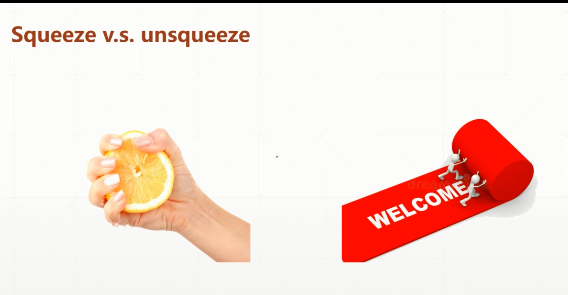

unsqueeze

> [-a.dim(),a.dim()+1]  

> eg:[-5,5)



In [ ]:
a = torch.rand(4,1,28,28)
a.shape

torch.Size([4, 1, 28, 28])

In [ ]:
a.unsqueeze(0).shape

torch.Size([1, 4, 1, 28, 28])

In [ ]:
a.unsqueeze(-1).shape

torch.Size([4, 1, 28, 28, 1])

In [ ]:
a.unsqueeze(4).shape

torch.Size([4, 1, 28, 28, 1])

In [ ]:
a.unsqueeze(-4).shape

torch.Size([4, 1, 1, 28, 28])

In [ ]:
a.unsqueeze(-5).shape

torch.Size([1, 4, 1, 28, 28])

In [ ]:
a.unsqueeze(5).shape

IndexError: ignored

In [ ]:
a = torch.tensor([1.2,2.3])
a.unsqueeze(-1)

tensor([[1.2000],
        [2.3000]])

In [ ]:
a.unsqueeze(0)

tensor([[1.2000, 2.3000]])

数据图像处理例子

In [ ]:
b = torch.rand(32)
f = torch.rand(4,32,14,14)
b = b.unsqueeze(1).unsqueeze(2).unsqueeze(0)
b.shape

torch.Size([1, 32, 1, 1])

In [ ]:
b.squeeze().shape

torch.Size([32])

In [ ]:
b.squeeze(0).shape

torch.Size([32, 1, 1])

值为1才会被挤压

In [ ]:
print(b.squeeze(-1).shape)
print(b.squeeze(1).shape)
print(b.squeeze(-4).shape)

torch.Size([1, 32, 1])
torch.Size([1, 32, 1, 1])
torch.Size([32, 1, 1])


Expand/repeat

> Expand：broadcasting

> Repeat：memory copied



In [ ]:
a = torch.rand(4,32,14,14)
b.shape

torch.Size([1, 32, 1, 1])

In [ ]:
b.expand(4,32,14,14).shape

torch.Size([4, 32, 14, 14])

In [ ]:
b.expand(-1,32,-1,-1).shape

torch.Size([1, 32, 1, 1])

a bug

In [ ]:
b.expand(-1,32,-1,-4).shape

torch.Size([1, 32, 1, -4])

Repeat

In [ ]:
b.shape

torch.Size([1, 32, 1, 1])

In [ ]:
b.repeat(4,32,1,1).shape

torch.Size([4, 1024, 1, 1])

In [ ]:
print(b.repeat(4,1,1,1).shape)
print(b.repeat(4,1,32,32).shape)

torch.Size([4, 32, 1, 1])
torch.Size([4, 32, 32, 32])


转置操作：只能用于矩阵即二维的tensor

In [ ]:
b.t()

RuntimeError: ignored

In [ ]:
a = torch.randn(3,4)
print(a)
a.t()

tensor([[-1.2955,  0.3400, -0.4790,  0.0402],
        [ 0.4619, -0.6320,  0.3550, -1.9218],
        [ 0.7889,  0.0190, -0.9650, -0.8241]])


tensor([[-1.2955,  0.4619,  0.7889],
        [ 0.3400, -0.6320,  0.0190],
        [-0.4790,  0.3550, -0.9650],
        [ 0.0402, -1.9218, -0.8241]])

transpose实现转置

In [ ]:
a = torch.rand(4,3,32,32)
a.shape

torch.Size([4, 3, 32, 32])

[b,c,h,w]->[b,w,h,c]->[b,c,w,h]

In [ ]:
a1 = a.transpose(1,3).contiguous().view(4,3*32*32).view(4,3,32,32)
a1.shape

torch.Size([4, 3, 32, 32])

[b,c,h,w]->[b,w,h,c]->[b,w,h,c]->[b,c,h,w]

In [ ]:
a2 = a.transpose(1,3).contiguous().view(4,3*32*32).view(4,32,32,3).transpose(1,3)
a2.shape

torch.Size([4, 3, 32, 32])

In [ ]:
print(torch.all(torch.eq(a,a1)))
print(torch.all(torch.eq(a,a2)))

tensor(False)
tensor(True)


permute根据索引进行维度的交换

In [ ]:
a = torch.rand(4,3,28,28)
a.transpose(1,3).shape

torch.Size([4, 28, 28, 3])

In [ ]:
b = torch.rand(4,3,28,32)
b.transpose(1,3).shape

torch.Size([4, 32, 28, 3])

In [ ]:
b.transpose(1,3).transpose(1,2).shape

torch.Size([4, 28, 32, 3])

In [ ]:
b.permute(0,2,3,1).shape

torch.Size([4, 28, 32, 3])

Broadcast

> insert 1 dim ahead

> Expand dims with size 1 to same size

> Feature maps:[4,32,14,14]

> Bias:[32,1,1]->[1,32,1,1]->[4,32,14,14]
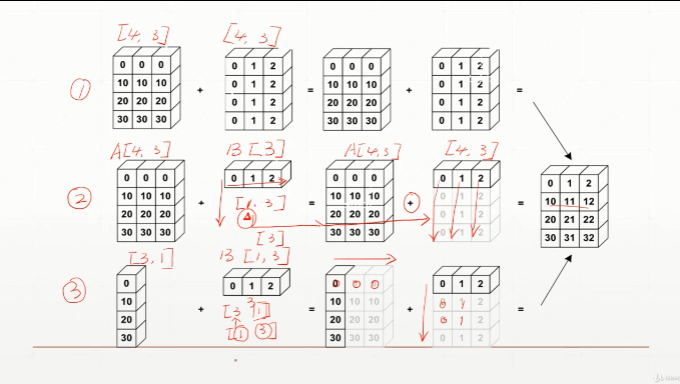

Why broadcasting

> 1.for actual demanding
[class,students,scores]
add bias for every students:+5score
[4,32,8]+[4,32,8]
[4,32,8]+[5.0]

> 2.memory consumption
[4,32,8]-->1024
[5.0]-->1


Is it broadcasting-able?


match from last dim!

>if current ddim=1,expand to same

>if either has no dim,insert one dim and expand to same

>otherwise,not broadcasting-able

eg1:A[4，32，14，14]
B[1, 32, 1, 1] -> [4, 32, 14, 14]

eg2:A[4, 32, 14, 14]
B[14, 14] -> [1, 1, 14, 14] -> [4,32,14,14]

eg3:A[4, 32, 14, 14]
B[2, 32, 14, 14] -> B[0] -> [32, 14, 14]


How to understand this behavior?


> when it has no dim

treat it as all own the same

[class,student,scores]+[scores]

> when it has dim of size 1

treat it shared by all

[class,student,scores]+[student,1]


拼接与拆分（merge or split）

> cat

> stack

> split

> chunk


cat 

[class1-4, students, scores]

[class5-9, students, scores]


In [ ]:
a = torch.rand(4,32,8)
b = torch.rand(5,32,8)
torch.cat([a,b],dim=0).shape

torch.Size([9, 32, 8])

In [ ]:
a1 = torch.rand(4,3,32,32)
a2 = torch.rand(5,3,32,32)
torch.cat([a1,a2],dim=0).shape

torch.Size([9, 3, 32, 32])

In [ ]:
a2 = torch.rand(4,1,32,32)
torch.cat([a1,a2],dim=0).shape

RuntimeError: ignored

In [ ]:
torch.cat([a1,a2],dim=1).shape

torch.Size([4, 4, 32, 32])

In [ ]:
a1 = torch.rand(4,3,16,32)
a2 = torch.rand(4,3,16,32)
torch.cat([a1,a2],dim=2).shape

torch.Size([4, 3, 32, 32])

stack:creat new dim

In [ ]:
torch.stack([a1,a2],dim=2).shape

torch.Size([4, 3, 2, 16, 32])

In [ ]:
a = torch.rand(32,8)
b = torch.rand(32,8)
torch.stack([a,b],dim=0).shape

torch.Size([2, 32, 8])

cat vs stack

In [ ]:
a.shape

torch.Size([32, 8])

In [ ]:
b = torch.rand([30,8])
torch.stack([a,b],dim=0)

RuntimeError: ignored

In [ ]:
torch.cat([a,b],dim=0).shape

torch.Size([62, 8])

Split:by len

In [ ]:
b = torch.rand(32,8)
a = torch.rand(32,8)
c = torch.stack([a,b],dim=0)
c.shape

torch.Size([2, 32, 8])

c.split([1,1],dim=0)中[1,1]第一个1表示第一份划分出来的值，第二个1表示第二份划分出来的值。

In [ ]:
aa, bb = c.split([1,1],dim=0)
aa.shape, bb.shape

(torch.Size([1, 32, 8]), torch.Size([1, 32, 8]))

split(a,dim=b)   a是划分出来每一份的值，b是被划分的维度。

In [ ]:
aa, bb = c.split(1,dim=0)
aa.shape, bb.shape

(torch.Size([1, 32, 8]), torch.Size([1, 32, 8]))

In [ ]:
aa, bb = c.split(2,dim=0)

ValueError: ignored

c.chunk(2,dim=0)中的第一个参数表示的是划分块的数量。

In [ ]:
aa, bb = c.chunk(2,dim=0)
aa.shape, bb.shape

(torch.Size([1, 32, 8]), torch.Size([1, 32, 8]))

##Pytorch基本运算

> Add/minus/multiply/divide

> Matmul

> Pow

> Sqrt/rsqrt

> Round


In [ ]:
a = torch.rand(3,4)
b = torch.rand(4)
print(a)
print(b)
a + b

tensor([[3.1450e-01, 9.4158e-01, 7.9074e-01, 7.1605e-01],
        [6.9956e-01, 5.6465e-01, 8.0249e-01, 6.6870e-04],
        [4.6052e-01, 1.6103e-01, 6.9311e-01, 9.2934e-01]])
tensor([0.9352, 0.8724, 0.5713, 0.6697])


tensor([[1.2497, 1.8140, 1.3621, 1.3857],
        [1.6348, 1.4371, 1.3738, 0.6703],
        [1.3958, 1.0334, 1.2644, 1.5990]])

In [ ]:
torch.add(a,b)

tensor([[1.2497, 1.8140, 1.3621, 1.3857],
        [1.6348, 1.4371, 1.3738, 0.6703],
        [1.3958, 1.0334, 1.2644, 1.5990]])

In [ ]:
print(torch.all(torch.eq(a-b,torch.sub(a,b))))
print(torch.all(torch.eq(a+b,torch.add(a,b))))
print(torch.all(torch.eq(a*b,torch.mul(a,b))))
print(torch.all(torch.eq(a/b,torch.div(a,b))))

tensor(True)
tensor(True)
tensor(True)
tensor(True)


matmul矩阵相乘

> torch.mm(only for 2d)

> torch.matmul

> @


In [ ]:
a = 3 * torch.ones(2,2)
print(a)
b = torch.ones(2,2)
print(b)
torch.mm(a,b)

tensor([[3., 3.],
        [3., 3.]])
tensor([[1., 1.],
        [1., 1.]])


tensor([[6., 6.],
        [6., 6.]])

In [ ]:
torch.matmul(a,b)

tensor([[6., 6.],
        [6., 6.]])

In [ ]:
a@b

tensor([[6., 6.],
        [6., 6.]])

In [ ]:
# for example
a = torch.rand(4,784)
x = torch.rand(4,784)
# 这里反过来写主要是为了符合pytorch的接口，rand(channel-out,channel-in)
w = torch.rand(512,784)
print((x@w.t()).shape)
print((x@w.transpose(1,0)).shape)

torch.Size([4, 512])
torch.Size([4, 512])


>2d tensor matmul?

In [ ]:
a = torch.rand(4,3,28,64)
b = torch.rand(4,3,64,32)
torch.mm(a,b).shape

RuntimeError: ignored

In [ ]:
torch.matmul(a,b).shape

torch.Size([4, 3, 28, 32])

broadcast and matmul

In [ ]:
b = torch.rand(4,1,64,32)
torch.matmul(a,b).shape

torch.Size([4, 3, 28, 32])

In [ ]:
b = torch.rand(4,64,32)
# b:[4,64,32]-->[1,4,64,32],but not calculate
torch.matmul(a,b).shape

RuntimeError: ignored

Power

In [ ]:
a = torch.full([2,2],3)
print(a.pow(2))
print(pow(a,2))

tensor([[9., 9.],
        [9., 9.]])
tensor([[9., 9.],
        [9., 9.]])


In [ ]:
print(a**2)
aa = a**2
print(aa.sqrt())
print(aa.rsqrt()) # 平方根的倒数
print(aa**0.5)

tensor([[9., 9.],
        [9., 9.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[0.3333, 0.3333],
        [0.3333, 0.3333]])
tensor([[3., 3.],
        [3., 3.]])


Exp log

In [ ]:
a = torch.exp(torch.ones(2,2))
a, torch.log(a),torch.log2(a)

(tensor([[2.7183, 2.7183],
         [2.7183, 2.7183]]), tensor([[1.0000, 1.0000],
         [1.0000, 1.0000]]), tensor([[1.4427, 1.4427],
         [1.4427, 1.4427]]))

Approximation

> .floor() .ceil()

> .round()

> .trunc():整数 .frac()：小数


In [ ]:
a = torch.tensor(3.14)
a.floor(), a.ceil(), a.trunc(), a.frac()

(tensor(3.), tensor(4.), tensor(3.), tensor(0.1400))

In [ ]:
a = torch.tensor(3.499)
print(a.round())
a = torch.tensor(3.5)
print(a.round())

tensor(3.)
tensor(4.)


clamp

> gradient clipping梯度裁剪

> (min):小于该值的取该值，大于该值的取原来的值

> (min, max):保留min和max之间的值，超出的取为min或者max

备注：w.grad.norm(2):计算w的梯度的L2范数

示例：

```
for w in []:
  clamp(w.grad, 10)
```




In [ ]:
grad = torch.rand(2,3)*15
print(grad)
grad.max(), grad.median(), grad.clamp(10), grad.clamp(0, 10)

tensor([[10.3500,  1.3233, 14.5629],
        [ 8.5034,  2.1616, 14.5909]])


(tensor(14.5909), tensor(8.5034), tensor([[10.3500, 10.0000, 14.5629],
         [10.0000, 10.0000, 14.5909]]), tensor([[10.0000,  1.3233, 10.0000],
         [ 8.5034,  2.1616, 10.0000]]))

Pytorch统计属性

> norm

> mean sum

> prod

> max,min,argmin,argmax

> kthvalue,topk


范数：norm

vs normalization,eg batch_norm

matrix norm vs vector norm(L1范数、L2范数......)

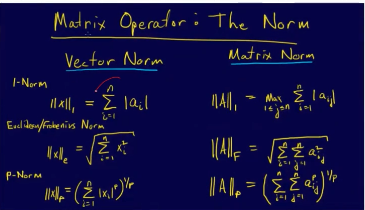


In [ ]:
a = torch.full([8], 1)
b = a.view(2, 4)
c = a.view(2,2,2)
print(b)
print(c)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])


In [ ]:
print(a.norm(1), b.norm(1), c.norm(1))
# 8的平方根
print(a.norm(2), b.norm(2), c.norm(2))

tensor(8.) tensor(8.) tensor(8.)
tensor(2.8284) tensor(2.8284) tensor(2.8284)


In [ ]:
print(b.norm(1, dim=1))
print(c.norm(1, dim=0))
print(c.norm(2, dim=0))

tensor([4., 4.])
tensor([[2., 2.],
        [2., 2.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


mean, sum, min, max, prod(累乘)

In [ ]:
a = torch.arange(8).view(2,4).float()
print(a)

tensor([[0., 1., 2., 3.],
        [4., 5., 6., 7.]])


In [ ]:
a.min(), a.max(), a.mean(), a.prod()

(tensor(0.), tensor(7.), tensor(3.5000), tensor(0.))

In [ ]:
print(a.sum())
print(a.argmax(), a.argmin())

tensor(28.)
tensor(7) tensor(0)


In [ ]:
a = a.view(1,2,4)
print(a)
print(a.argmax())
print(a.argmin())
a = torch.rand(2,3,4)
print(a)
print(a.argmax())

tensor([[[0., 1., 2., 3.],
         [4., 5., 6., 7.]]])
tensor(7)
tensor(0)
tensor([[[0.6785, 0.9174, 0.7717, 0.5655],
         [0.5556, 0.3833, 0.6567, 0.6505],
         [0.8841, 0.9020, 0.8807, 0.7829]],

        [[0.0880, 0.5258, 0.5632, 0.7801],
         [0.0484, 0.2317, 0.5541, 0.4988],
         [0.0254, 0.6926, 0.4244, 0.7610]]])
tensor(1)


In [ ]:
a = torch.randn(4,10)
print(a[0])
print(a.argmax())
print(a.argmax(dim=1))

tensor([ 0.7600,  0.2269,  0.9008, -1.0793, -0.1143,  0.0174,  1.1405, -0.2454,
         0.7558, -0.2671])
tensor(33)
tensor([6, 5, 8, 3])


dim, keepdim

In [ ]:
print(a)
print(a.max(dim=1))
print(a.argmax(dim=1))
print(a.max(dim=1, keepdim=True))
print(a.argmax(dim=1, keepdim=True))

tensor([[ 0.7600,  0.2269,  0.9008, -1.0793, -0.1143,  0.0174,  1.1405, -0.2454,
          0.7558, -0.2671],
        [ 0.5040,  0.2189,  0.3844, -0.0906, -0.1724,  1.2118,  0.9011,  0.7587,
         -0.4063, -1.1892],
        [-0.0097, -1.6364, -0.1280, -1.5895,  0.3112,  0.2933, -0.8323,  0.7096,
          1.0515,  0.7961],
        [-0.4788,  1.2408, -0.9316,  1.5037,  0.6242, -0.1719,  0.1490,  1.0579,
         -0.5396,  0.3691]])
torch.return_types.max(
values=tensor([1.1405, 1.2118, 1.0515, 1.5037]),
indices=tensor([6, 5, 8, 3]))
tensor([6, 5, 8, 3])
torch.return_types.max(
values=tensor([[1.1405],
        [1.2118],
        [1.0515],
        [1.5037]]),
indices=tensor([[6],
        [5],
        [8],
        [3]]))
tensor([[6],
        [5],
        [8],
        [3]])


Top-k or k-th

> .topk (Largest):返回前k个数的值和索引

> kthvalue

In [ ]:
a.topk(3, dim=1)

torch.return_types.topk(values=tensor([[1.1405, 0.9008, 0.7600],
        [1.2118, 0.9011, 0.7587],
        [1.0515, 0.7961, 0.7096],
        [1.5037, 1.2408, 1.0579]]), indices=tensor([[6, 2, 0],
        [5, 6, 7],
        [8, 9, 7],
        [3, 1, 7]]))

In [ ]:
a.topk(3, dim=1, largest=False) # 求最小的三个

torch.return_types.topk(values=tensor([[-1.0793, -0.2671, -0.2454],
        [-1.1892, -0.4063, -0.1724],
        [-1.6364, -1.5895, -0.8323],
        [-0.9316, -0.5396, -0.4788]]), indices=tensor([[3, 9, 7],
        [9, 8, 4],
        [1, 3, 6],
        [2, 8, 0]]))

In [ ]:
print(a.kthvalue(8, dim=1))
print(a.kthvalue(3))
print(a.kthvalue(3, dim=1))

torch.return_types.kthvalue(
values=tensor([0.7600, 0.7587, 0.7096, 1.0579]),
indices=tensor([0, 7, 7, 7]))
torch.return_types.kthvalue(
values=tensor([-0.2454, -0.1724, -0.8323, -0.4788]),
indices=tensor([7, 4, 6, 0]))
torch.return_types.kthvalue(
values=tensor([-0.2454, -0.1724, -0.8323, -0.4788]),
indices=tensor([7, 4, 6, 0]))


compare

```
>, >=, <, <=, !=, ==
```

```
torch.eq(a, b) # 判断每个元素是否一样
torch.equal(a, b) # 判断两个元素是否一样
```

In [ ]:
a>0

tensor([[ True,  True,  True, False, False,  True,  True, False,  True, False],
        [ True,  True,  True, False, False,  True,  True,  True, False, False],
        [False, False, False, False,  True,  True, False,  True,  True,  True],
        [False,  True, False,  True,  True, False,  True,  True, False,  True]])

In [ ]:
torch.gt(a, 0)

tensor([[ True,  True,  True, False, False,  True,  True, False,  True, False],
        [ True,  True,  True, False, False,  True,  True,  True, False, False],
        [False, False, False, False,  True,  True, False,  True,  True,  True],
        [False,  True, False,  True,  True, False,  True,  True, False,  True]])

In [ ]:
a!=0

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

In [ ]:
a = torch.ones(2, 3)
b = torch.randn(2, 3)
print(torch.eq(a, b))
print(torch.eq(a, a))
print(torch.equal(a, a))

tensor([[False, False, False],
        [False, False, False]])
tensor([[True, True, True],
        [True, True, True]])
True


高阶op

> where

> Gather


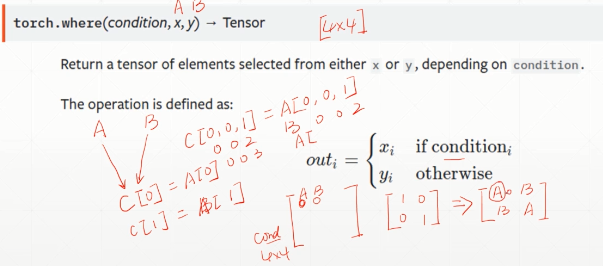

In [ ]:
cond = torch.tensor([[0.6769, 0.7271], [0.8884, 0.4163]])
a = torch.zeros(2,2)
b = torch.ones(2,2)
torch.where(cond>0.5, a, b) # cond每个元素的值如果大于0.5，取a，否则取b。

tensor([[0., 0.],
        [0., 1.]])

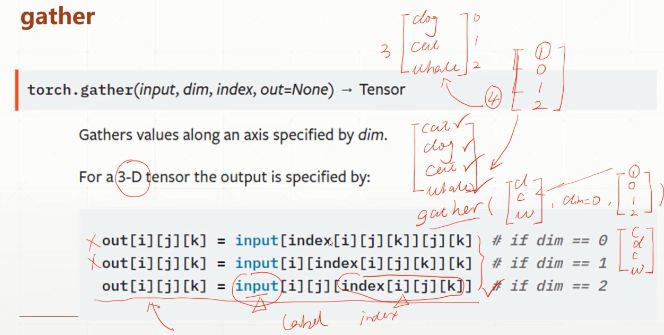

In [ ]:
# retrieve label
prob = torch.randn(4, 10)
idx = prob.topk(dim=1, k=3)
print(idx)
idx = idx[1]
print(idx)
label = torch.arange(10) + 100
print(label)
torch.gather(label.expand(4, 10), dim=1, index=idx.long())

torch.return_types.topk(
values=tensor([[1.6469, 1.2836, 1.2674],
        [1.4837, 0.8081, 0.5553],
        [2.1149, 1.6622, 1.5918],
        [1.0123, 0.9807, 0.9386]]),
indices=tensor([[4, 7, 9],
        [7, 2, 0],
        [4, 9, 0],
        [9, 3, 5]]))
tensor([[4, 7, 9],
        [7, 2, 0],
        [4, 9, 0],
        [9, 3, 5]])
tensor([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])


tensor([[104, 107, 109],
        [107, 102, 100],
        [104, 109, 100],
        [109, 103, 105]])

Pytorch梯度

In [ ]:
# sigmoid
a = torch.linspace(-100, 100, 10)
print(a)
torch.sigmoid(a)

tensor([-100.0000,  -77.7778,  -55.5556,  -33.3333,  -11.1111,   11.1111,
          33.3333,   55.5555,   77.7778,  100.0000])


tensor([0.0000e+00, 1.6655e-34, 7.4564e-25, 3.3382e-15, 1.4945e-05, 9.9999e-01,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00])

In [ ]:
# tanh
a = torch.linspace(-100, 100, 10)
torch.tanh(a) 

tensor([-1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.])

In [ ]:
from torch.nn import functional as F
a = torch.linspace(-1, 1, 10)
print(torch.relu(a))
print(F.relu(a))

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1111, 0.3333, 0.5556, 0.7778,
        1.0000])
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1111, 0.3333, 0.5556, 0.7778,
        1.0000])


Loss 梯度

1.   mean squared error(MSE)
2.   cross entropy loss



In [ ]:
# 使用pytorch自动求导 y = x*w + b
# autograd.grad
x = torch.ones(1)
w = torch.full([1],2)
mse = F.mse_loss(x*w, torch.ones(1))
mse

tensor(1.)

In [ ]:
torch.autograd.grad(mse, [w])

RuntimeError: ignored

In [ ]:
w.requires_grad_()

tensor([2.], requires_grad=True)

In [ ]:
mse = F.mse_loss(x*w, torch.ones(1))
torch.autograd.grad(mse, [w])
# / w = torch.tensor([1.], requires_grad=True)

(tensor([2.]),)

In [ ]:
# loss backward
mse = F.mse_loss(x*w, torch.ones(1))
mse.backward()
w.grad

tensor([2.])

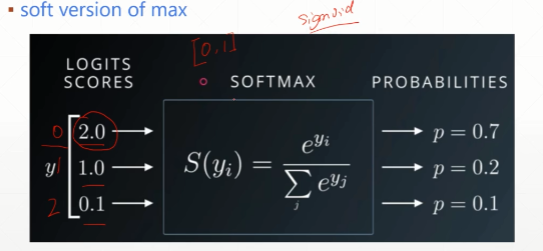

In [ ]:
# F.softmax
a = torch.rand(3)
a.requires_grad_()

tensor([0.3869, 0.7546, 0.8535], requires_grad=True)

In [ ]:
p = F.softmax(a, dim=0)
p.backward(retain_graph=True)
p.backward()

RuntimeError: ignored

In [ ]:
p = F.softmax(a, dim=0)
# p:[3]
torch.autograd.grad(p[1],[a],retain_graph=True)

(tensor([-0.0885,  0.2297, -0.1412]),)

In [ ]:
torch.autograd.grad(p[2],[a])

(tensor([-0.0977, -0.1412,  0.2389]),)

感知机的梯度推导

In [ ]:
# 单层
x = torch.rand(1, 10)
w = torch.rand(1, 10, requires_grad=True)
sig = torch.sigmoid(x@w.t())
sig.shape

torch.Size([1, 1])

In [ ]:
loss = F.mse_loss(torch.ones(1, 1), sig)
print(loss.shape)
loss.backward()
print(w.grad)

torch.Size([])
tensor([[-0.0085, -0.0034, -0.0142, -0.0096, -0.0155, -0.0049, -0.0086, -0.0075,
         -0.0003, -0.0160]])


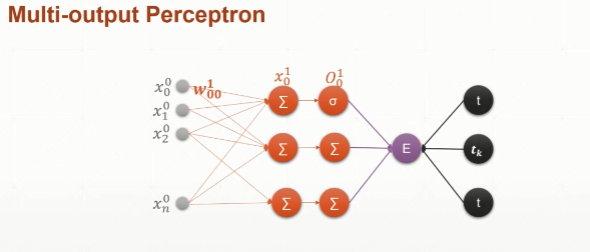

In [ ]:
# 多层
x = torch.rand(1, 10)
w = torch.rand(2, 10, requires_grad=True)
sig = torch.sigmoid(x@w.t())
sig.shape

torch.Size([1, 2])

In [ ]:
loss = F.mse_loss(torch.ones(1, 2), sig)  # boardcast
print(loss)
loss.backward()
print(w.grad)

tensor(0.0104, grad_fn=<MeanBackward0>)
tensor([[-0.0050, -0.0137, -0.0120, -0.0056, -0.0011, -0.0136, -0.0056, -0.0024,
         -0.0042, -0.0054],
        [-0.0007, -0.0020, -0.0018, -0.0008, -0.0002, -0.0020, -0.0008, -0.0004,
         -0.0006, -0.0008]])


链式法则

In [ ]:
x = torch.tensor(1.)
w1 = torch.tensor(2., requires_grad=True)
b1 = torch.tensor(1.)
w2 = torch.tensor(2., requires_grad=True)
b2 = torch.tensor(1.)

y1 = x*w1 + b1
y2 = y1*w2 + b2
dy2_dy1 = torch.autograd.grad(y2, [y1], retain_graph=True)[0] # the ouput of torch.autograd.grad(y2, [y1], retain_graph=True) is a tuple.
dy1_dw1 = torch.autograd.grad(y1, [w1], retain_graph=True)[0]
dy2_dw1 = torch.autograd.grad(y2, [w1], retain_graph=True)[0]
print(dy2_dy1*dy1_dw1)
print(dy2_dw1)

tensor(2.)
tensor(2.)


MLP反向传播
(函数极小值优化实战)

In [ ]:
def himmelblau(x):
  return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 -7) ** 2

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


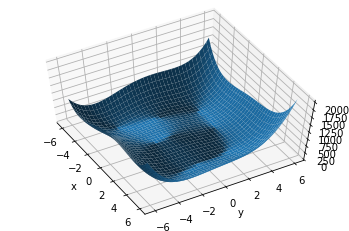

In [ ]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x,y range:', x.shape, y.shape)
X,Y = np.meshgrid(x,y) # build (x, y)
print('X,Y maps:', X.shape, Y.shape)
Z = himmelblau([X, Y])

fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [ ]:
# d_pred/d_x
# chage init:[-2., 0.],[1., 0.],[-4., 0.],[4., 0.]
# f(-3.779310, -3.283186)=0.0 f(3.0, 2.0)=0.0 
# f(3.584428, -1.848126)=0.0 f(-2.805118, 3.131312)=0.0 
x = torch.tensor([-2., 0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)
for step in range(20000 + 1):

  pred = himmelblau(x)

  optimizer.zero_grad()
  pred.backward()
  optimizer.step()

  if step % 2000 == 0:
    print('step {}: x = {}, f(x) = {}'
       .format(step, x.tolist(), pred.item()))

step 0: x = [-2.000999927520752, 0.0009999999310821295], f(x) = 130.0
step 2000: x = [-2.813312292098999, 2.4152591228485107], f(x) = 16.324583053588867
step 4000: x = [-2.805009126663208, 3.127446413040161], f(x) = 0.0006056121201254427
step 6000: x = [-2.805115222930908, 3.1313023567199707], f(x) = 4.380353857413866e-09
step 8000: x = [-2.805117130279541, 3.1313087940216064], f(x) = 5.932179192313924e-10
step 10000: x = [-2.8051178455352783, 3.1313111782073975], f(x) = 6.639311322942376e-11
step 12000: x = [-2.8051180839538574, 3.131312131881714], f(x) = 5.6843418860808015e-12
step 14000: x = [-2.8051180839538574, 3.131312370300293], f(x) = 2.2737367544323206e-13
step 16000: x = [-2.8051180839538574, 3.131312608718872], f(x) = 2.2737367544323206e-13
step 18000: x = [-2.8051180839538574, 3.131312608718872], f(x) = 2.2737367544323206e-13
step 20000: x = [-2.8051211833953857, 3.131312370300293], f(x) = 2.6852831069845706e-10
step 22000: x = [-2.8051059246063232, 3.131315231323242], f(x)

交叉熵（Cross Entropy Loss）

Lottery

In [ ]:
a = torch.full([4], 1/4)
print(a)
print(a*torch.log2(a))
print(-(a*torch.log2(a)).sum())

tensor([0.2500, 0.2500, 0.2500, 0.2500])
tensor([-0.5000, -0.5000, -0.5000, -0.5000])
tensor(2.)


In [ ]:
a = torch.tensor([0.1, 0.1, 0.1, 0.7])
print(-(a*torch.log2(a)).sum())
a = torch.tensor([0.001, 0.001, 0.001, 0.999])
print(-(a*torch.log2(a)).sum())

tensor(1.3568)
tensor(0.0313)


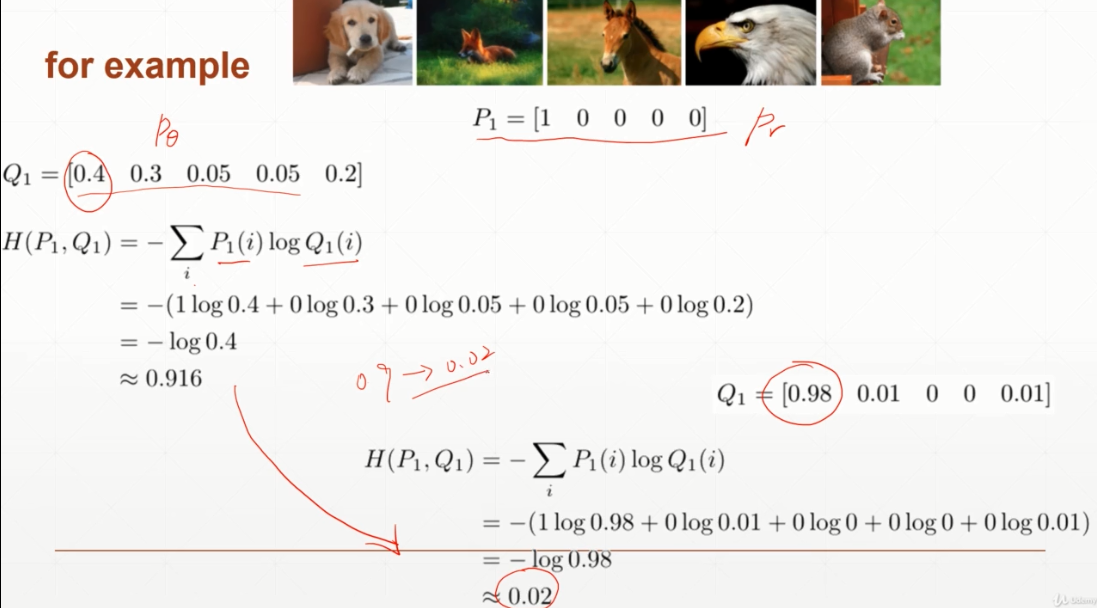

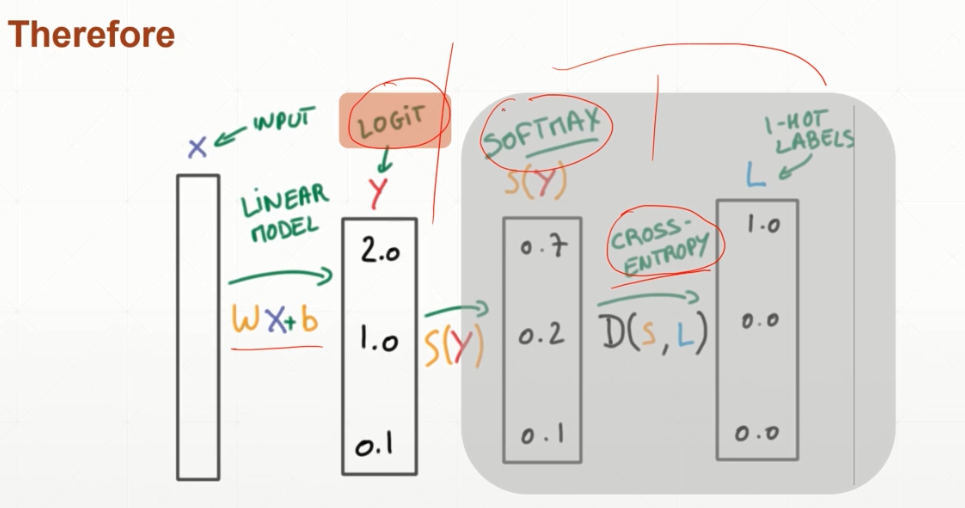

In [ ]:
x = torch.randn(1, 784)
w = torch.randn(10, 784)
logits = x@w.t()
print(logits.shape)
pred = F.softmax(logits, dim=1)
pred_log = torch.log(pred)

# cross_entropy = softmax + log + nll_loss
F.cross_entropy(logits, torch.tensor([3]))
print(F.cross_entropy(logits, torch.tensor([3])))

F.nll_loss(pred_log, torch.tensor([3]))
print(F.nll_loss(pred_log, torch.tensor([3])))

torch.Size([1, 10])
tensor(23.8566)
tensor(23.8566)


全连接层

In [ ]:
x = torch.randn([1, 784])
print(x.shape)
layer1 = torch.nn.Linear(784, 200)
layer2 = torch.nn.Linear(200, 200)
layer3 = torch.nn.Linear(200, 10)
x = layer1(x)
print(x.shape)
x = layer2(x)
print(x.shape)
x = layer3(x)
print(x.shape)

torch.Size([1, 784])
torch.Size([1, 200])
torch.Size([1, 200])
torch.Size([1, 10])


In [ ]:
x = torch.randn([1, 784])
print(x.shape)
layer1 = torch.nn.Linear(784, 200)
layer2 = torch.nn.Linear(200, 200)
layer3 = torch.nn.Linear(200, 10)
x = layer1(x)
x = F.relu(x, inplace=True)
print(x.shape)
x = layer2(x)
x = F.relu(x, inplace=True)
print(x.shape)
x = layer3(x)
x = F.relu(x, inplace=True)
print(x.shape)

torch.Size([1, 784])
torch.Size([1, 200])
torch.Size([1, 200])
torch.Size([1, 10])


look 039linear_multi_classification.py

In [ ]:
import torch.nn as nn
class MLP(nn.Module):

  def __init__(self):
    super(MLP, self).__init__()

    self.mmodel = nn.Sequential(
        nn.Linear(784, 200),
        nn.ReLU(inplace=True),
        nn.Linear(200, 200),
        nn.ReLU(inplace=True),
        nn.Linear(200, 10),
        nn.ReLU(inplace=True)
    )
  def forward(self, x):
    x = self.model(x)
    retuurn x

look 040MLP_Module_Linear.py

nn.ReLU v.s. F.relu()

> class-style API

> function-style API

In [ ]:
x = torch.randn([1, 10])
print(x.shape)
x = F.relu(x, inplace=True)
layer = nn.ReLU()
x = layer(x)

torch.Size([1, 10])


测试

argmax

look 042test_validation.py

In [ ]:
logits = torch.rand(4, 10)
pred = F.softmax(logits, dim=1)
print(pred.shape)
pred_label = pred.argmax(dim=1)
print(pred_label)
print(logits.argmax(dim=1))
label = torch.tensor([9,3,2,4])
correct = torch.eq(pred_label, label)
print(correct)
correct.sum().float().item()/4 # correct.sum()=1

torch.Size([4, 10])
tensor([1, 3, 8, 0])
tensor([1, 3, 8, 0])
tensor([False,  True, False, False])


0.25

可视化工具tensorboardX

In [ ]:
from tensorboardX import SummaryWriter
writer = SummaryWriter()
writer.add_scalar('data/scalar1', dummy_s1[0], n_iter)
writer.add_scalars('data/scalar_group', {'xsinx': n_iter * np.sin(n_iter),
                     'xcosx': n_iter * np.sin(n_iter),
                     'arctanx': np.arctan(n_iter)}, n_iter)

writer.add_image('Image', x, n_iter)
writer.add_text('Text','text logged at step:' + str(n_iter), n_iter)

for name, param in resnet18.named_parameters():
  writer.add_histogram(name. param.clone().cpu().data.numpy(),n_iter)

writer.close()

可视化工具visdom

In [ ]:
# lines: single trace
from visdom import VisDom
viz = Visdom()

# create a line : win=ID envs(default)='main'
viz.line([0.],[0.], win='train_loss', opts=dict(title='train_loss'))

# global_step=x
viz.line([loss.item()],[global_step],win='train_loss',update='append')

In [ ]:
# lines: multi-traces
from visdom import VisDom
viz = Visdom()

# [0.0,0.0]=[y1,y2] [0.]=x ['loss','acc.']=['y1.legend', 'y2.legend']
viz.line([0.0,0.0], [0.], win='test', opts=dict(title='test_loss&acc.',legend=['loss','acc.']))

viz.line([[test_loss, correct / len(test_loader.dataset)]], 
         [global_step], win='test', update='append')

In [ ]:
# visual X
from visdom import Visdom
viz = Visdom()

viz.images(data.view(-1, 1, 28, 28), win='x')
viz.text(str(pred.detach().cpu().numpy()), win='pred',
         opts=dict(title='pred'))

Regularization

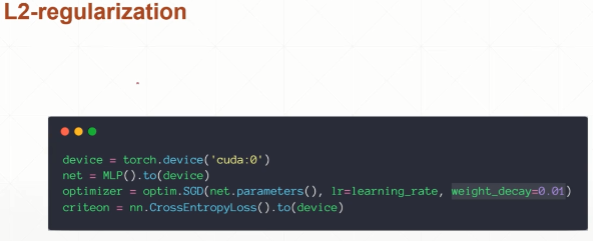

In [ ]:
device = torch.device('cuda:0')
net = MLP().to(device)
optimizer = optim.SGD(net.parameters(), lr=learning-rate, weight_decay=0.01)
criteon = nn.CrossEntropyLoss().to(device)

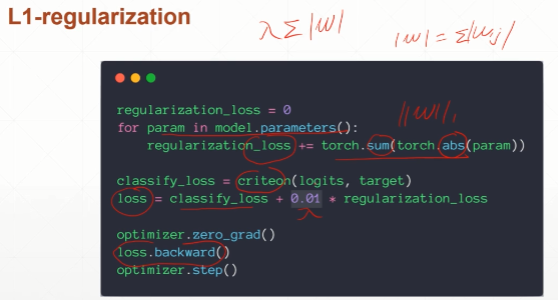

In [ ]:
regularization_loss = 0
for param in model.parameters():
  regularization_loss += torch.sum(torch.abs(param))

classify_loss = criteon(logits, target)
loss = classify_loss + 0.01 * regularization_loss

optimizer.zero_grad()
loss.backward()
optimizer.step()

动量与学习率衰减

> momentum

> learning rate decay


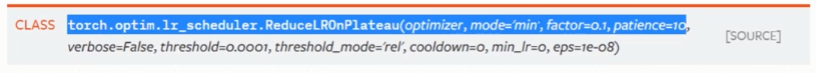

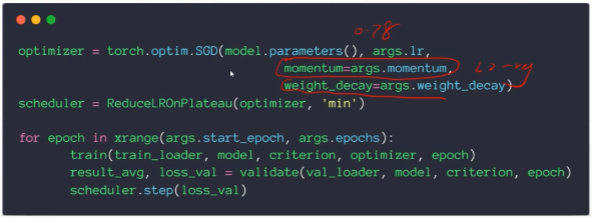

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), args.lr,
               momentum=args.momentum,
               weight_decay=args.weight_decay)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opeimizer,'min')

for epoch in xrange(args.start_epoch, args.epochs):
  train(train_loader, model, criterion, optimizer, epoch)
  result_avg, loss_val = validate(val_loader, model, criterion, epoch)
  scheduler.step(loss_val)

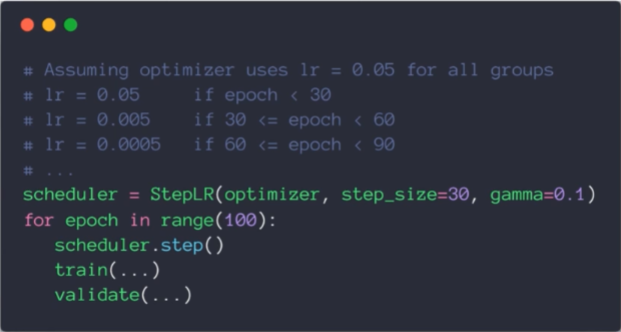

In [ ]:
scheduler = StepLR(optimizer, step_size=30, gamma==0.1)
for epoch in range(100):
  scheduler.step()
  train()
  validate()

dropout

In [ ]:
net_dropped=torch.nn.Sequential(
    torch.nn.Linear(784, 200),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(200, 200),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(200, 10))

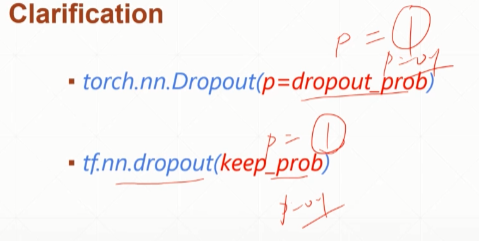

In [ ]:
for epoch in range(epochs):
  # train
  net_dropped.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    ...

  net_dropped.eval()
  val_loss=0
  correct=0
  for data, target in val_loader:
    ...

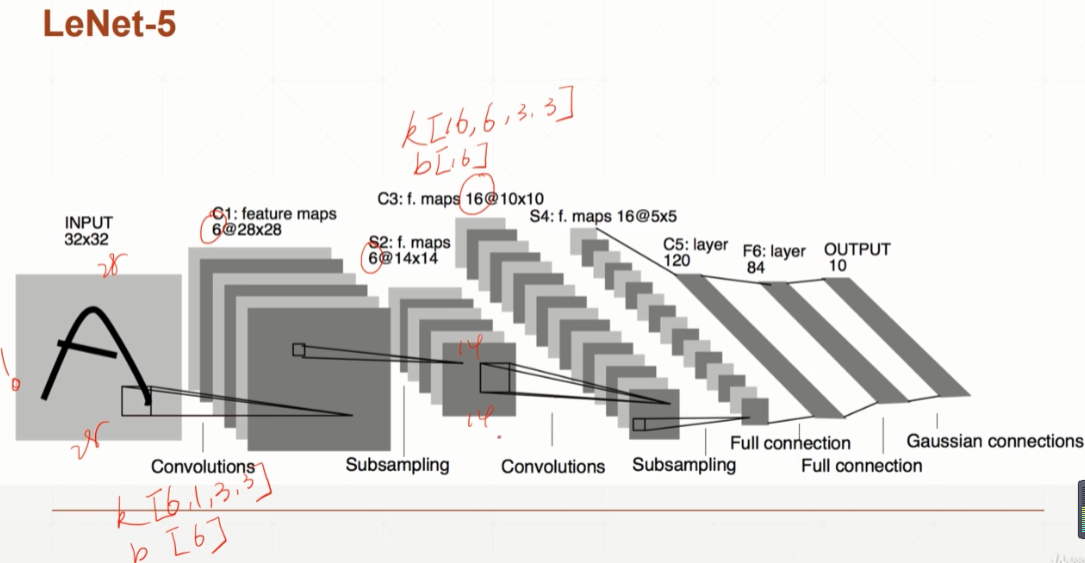

nn.Conv2d

In [ ]:
layer = torch.nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=0)
x = torch.rand(1, 1, 28, 28)

out = layer.forward(x)
print(out.shape)

layer = torch.nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1)
out = layer.forward(x)
print(out.shape)

layer = torch.nn.Conv2d(1, 3, kernel_size=3, stride=2, padding=1)
out = layer.forward(x)
print(out.shape)

out = layer(x)
print(out.shape)

torch.Size([1, 3, 26, 26])
torch.Size([1, 3, 28, 28])
torch.Size([1, 3, 14, 14])
torch.Size([1, 3, 14, 14])


Inner weight & bias

In [ ]:
layer.weight

Parameter containing:
tensor([[[[-0.2131,  0.0422,  0.2151],
          [-0.1089, -0.2309, -0.2847],
          [ 0.1425,  0.1324, -0.0806]]],


        [[[ 0.0440,  0.0572,  0.1403],
          [ 0.2106, -0.0998,  0.2920],
          [-0.2576, -0.1772,  0.1188]]],


        [[[-0.1714, -0.2933,  0.0261],
          [-0.0604,  0.0258, -0.2446],
          [ 0.2647, -0.1593, -0.2969]]]], requires_grad=True)

In [ ]:
print(layer.weight.shape)
print(layer.bias.shape)

torch.Size([3, 1, 3, 3])
torch.Size([3])


F.conv2d

In [ ]:
w = torch.rand(16,3,5,5)
b = torch.rand(16)

out = F.conv2d(x, w, b, stride=1, padding=1)

RuntimeError: ignored

In [ ]:
x = torch.randn(1, 3, 28, 28)
out = F.conv2d(x, w, b, stride=1, padding=1)
print(out.shape)

out = F.conv2d(x, w, b, stride=2, padding=2)
print(out.shape)

torch.Size([1, 16, 26, 26])
torch.Size([1, 16, 14, 14])


池化Pooling(下采样)

In [ ]:
x = out 
print(x.shape)
layer = torch.nn.MaxPool2d(2, stride=2)
out = layer(x)
print(out.shape)
out = F.avg_pool2d(x, 2, stride=2)
print(out.shape)

torch.Size([1, 16, 14, 14])
torch.Size([1, 16, 7, 7])
torch.Size([1, 16, 7, 7])


上采样（F.interpolate）

In [ ]:
# F.interpolate实现插值和上采样
x = out 
out = F.interpolate(x, scale_factor=2, mode='nearest')
print(out.shape)

out = F.interpolate(x, scale_factor=3, mode='nearest')
print(out.shape)

torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 42, 42])


ReLU
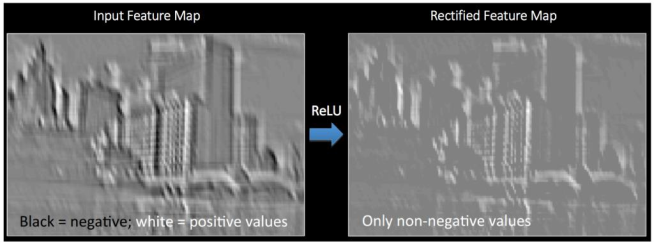

In [ ]:
print(x.shape)
layer = torch.nn.ReLU(inplace=True)
out = layer(x)
print(out.shape)
out = F.relu(x)
print(out.shape)

torch.Size([1, 16, 14, 14])
torch.Size([1, 16, 14, 14])
torch.Size([1, 16, 14, 14])


Feature scaling
>Image Normalization

>Batch Normalization

In [ ]:
# Image Normalization
normalize = traonsforms.Normalize(mean=[0.485, 0.456, 0.406],
                  std=[0.229, 0.224, 0.225])

In [ ]:
# BatchNormalization
x = torch.rand(100, 16, 784)
layer = torch.nn.BatchNorm1d(16)
out = layer(x)
print(layer.running_mean)
print(layer.running_var)

tensor([0.0501, 0.0500, 0.0499, 0.0499, 0.0499, 0.0502, 0.0500, 0.0500, 0.0500,
        0.0500, 0.0500, 0.0501, 0.0502, 0.0501, 0.0500, 0.0499])
tensor([0.9084, 0.9084, 0.9083, 0.9083, 0.9083, 0.9083, 0.9083, 0.9083, 0.9083,
        0.9084, 0.9083, 0.9083, 0.9083, 0.9083, 0.9084, 0.9083])


In [ ]:
x = torch.randn(1, 16, 7, 7)
print(x.shape)
layer = torch.nn.BatchNorm2d(16)
out = layer(x)
print(out.shape)
print(layer.weight)
print(layer.weight.shape)
print(layer.bias.shape)

torch.Size([1, 16, 7, 7])
torch.Size([1, 16, 7, 7])
Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True)
torch.Size([16])
torch.Size([16])


In [ ]:
vars(layer)

{'_backward_hooks': OrderedDict(),
 '_buffers': OrderedDict([('running_mean',
               tensor([-0.0182,  0.0195, -0.0013, -0.0355, -0.0143,  0.0033,  0.0012,  0.0381,
                       -0.0147,  0.0205, -0.0089, -0.0169,  0.0257,  0.0028, -0.0060, -0.0129])),
              ('running_var',
               tensor([0.9873, 0.9816, 0.9905, 1.0090, 0.9906, 1.0208, 0.9832, 1.0027, 0.9998,
                       0.9671, 0.9861, 1.0255, 0.9917, 0.9960, 0.9982, 0.9837])),
              ('num_batches_tracked', tensor(1))]),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                      requires_grad=True)), ('bias', Parameter containing:
               tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
           

In [ ]:
# Test
layer.eval()
torch.nn.BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
out = layer(x)
print(out.shape)

torch.Size([1, 16, 7, 7])


Resnet

In [ ]:
import torch.nn as nn
class ResBlock(nn.Module):
  def __init__(self, ch_in, ch_out):
    super(ResBlock, self).__init__()
    self.conv1 = nn.Conv2d(ch_in, ch_out, kernel_size=3, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(ch_out)
    self.relu1 = nn.ReLU(inplace=True)
    self.conv2 = nn.Conv2d(ch_out, ch_out, kernel_size=3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(ch_out)

    self.extra = nn.Sequential()
    if ch_out != ch_in:
      #[b,ch_in,h,w]=>[b,ch_out,h,w]
      self.extra=nn.Sequential(
          nn.Conv2d(ch_in, ch_out, kernel_size=1, stride=1),
          nn.BatchNorm2d(ch_out)
      )
  def forward(self, x):
    out = self.relu1(self.bn1(self.conv1(x)))
    out = self.bn2(self.conv2(out))
    out = self.extra(x) + out
    return out

nn.Module

In [ ]:
class MyLinear(nn.Module):

  def __init__(self, inp, outp):
    super(MyLinear, self).__init__()

    # requires_grad=True
    # *********** 
    self.w = nn.Parameter(torch.randn(outp, inp))
    self.b = nn.Parameter(torch.randn(outp))

  def forward(self, x):
    x = x @ self.w.t() + self.b
    return x

container

>net(x)

```
self.net = nn.Sequential(
  nn.Conv2d(1, 32, 5, 1, 1)
  nn.MaxPool2d(2, 2)
  nn.ReLU(True)
  nn.BatchNorm2d(32)

  nn.Conv2d(32, 64, 3, 1, 1)
  nn.ReLU(True)
  nn.BatchNorm2d(64)

  nn.Conv2d(64, 64, 3, 1, 1)
  nn.MaxPool2d(2, 2)
  nn.ReLU(True)
  nn.BatchNorm2d(64)

  nn.Conv2d(64, 128, 3, 1, 1)
  nn.ReLU(True)
  nn.BatchNorm2d(128)
)
```



In [ ]:
# parameters
net = nn.Sequential(nn.Linear(4, 2),nn.Linear(2, 2))
print(list(net.parameters())[0].shape)
print(list(net.parameters())[3].shape)
print(list(net.named_parameters())[0])
print(list(net.named_parameters())[1])
print(dict(net.named_parameters()).items())

torch.Size([2, 4])
torch.Size([2])
('0.weight', Parameter containing:
tensor([[ 0.4703, -0.0582, -0.0708,  0.1255],
        [ 0.0452,  0.0100, -0.4617,  0.2414]], requires_grad=True))
('0.bias', Parameter containing:
tensor([-0.2903, -0.3336], requires_grad=True))
dict_items([('0.weight', Parameter containing:
tensor([[ 0.4703, -0.0582, -0.0708,  0.1255],
        [ 0.0452,  0.0100, -0.4617,  0.2414]], requires_grad=True)), ('0.bias', Parameter containing:
tensor([-0.2903, -0.3336], requires_grad=True)), ('1.weight', Parameter containing:
tensor([[ 0.2407,  0.0995],
        [-0.1685, -0.5505]], requires_grad=True)), ('1.bias', Parameter containing:
tensor([-0.3424, -0.2508], requires_grad=True))])


In [ ]:
optimizer = torch.optim.SGD(net.parameters(),lr=1e-3)

5.to(device)

```
device = torch.device('cuda')
net = Net()
net.to(device)
```


6.save and load

```
device = torch.device('cuda')
net = Net()
net.to(device)

net.load_state_dict(torch.load(ckpt.mdl))

# train
torch.save(net.state_dict(), 'ckpt.mdl')
```



7.train/test

```
device=torch.device('cuda')
net = Net()
net.to(device)

# train
net.train()

# test
net.eval()
```



8.implement own layer


```
class Flatten(nn.Module):
  def __init__(self):
    super(Flatten, self).__init__（）
  
  def forward(self, input):
    return input.view(input.size(0), -1)

class TestNet(nn.Module):

  def __init__(self):
    super(TestNet, self).__init__()
    self.net = nn.Sequential(nn.Conv2d(1, 16, stride=1, padding=1),
                 nn.MaxPool2d(2, 2),
                 Flatten(),
                 nn.Linear(1*14*14, 10))

  def forward(self, x):
    return self.net(x)
```



In [ ]:
# 数据增强Flip
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
            transform = transforms.Compose([
                   transforms.RandomHorizonFlip(),
                   transforms.RandomVerticalFlip(),
                   transforms.ToTensor(),
                   # transforms.Normalize(0.1307,), (0.3081,
                   ])),
    batch_size=batch_size, shuffle=True)

In [ ]:
# 数据增强Rotate
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
            transform = transforms.Compose([
                   transforms.RandomHorizonFlip(),
                   transforms.RandomVerticalFlip(),
                   # -15 < degree < 15
                   transforms.RandomRotation(15),
                   transforms.RandomRotation([90, 180, 270])
                   transforms.ToTensor(),
                   # transforms.Normalize(0.1307,), (0.3081,
                   ])),
    batch_size=batch_size, shuffle=True)

In [ ]:
# 数据增强Scale=Resize
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
            transform = transforms.Compose([
                   transforms.RandomHorizonFlip(),
                   transforms.RandomVerticalFlip(),
                   # -15 < degree < 15
                   transforms.RandomRotation(15),
                   transforms.RandomRotation([90, 180, 270]),
                   transforms.Resize([32, 32]),
                   transforms.ToTensor(),
                   # transforms.Normalize(0.1307,), (0.3081,
                   ])),
    batch_size=batch_size, shuffle=True)

In [ ]:
# 数据增强Crop Part
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
            transform = transforms.Compose([
                   transforms.RandomHorizonFlip(),
                   transforms.RandomVerticalFlip(),
                   # -15 < degree < 15
                   transforms.RandomRotation(15),
                   transforms.RandomRotation([90, 180, 270]),
                   transforms.Resize([32, 32]),
                   transforms.RandomCrop([28, 28]),
                   transforms.ToTensor(),
                   # transforms.Normalize(0.1307,), (0.3081,
                   ])),
    batch_size=batch_size, shuffle=True)

In [ ]:
# 数据增强Crop Part
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
            transform = transforms.Compose([
                   transforms.RandomHorizonFlip(),
                   transforms.RandomVerticalFlip(),
                   # -15 < degree < 15
                   transforms.RandomRotation(15),
                   transforms.RandomRotation([90, 180, 270]),
                   transforms.Resize([32, 32]),
                   transforms.RandomCrop([28, 28]),
                   transforms.ToTensor(),
                   # transforms.Normalize(0.1307,), (0.3081,
                   ])),
    batch_size=batch_size, shuffle=True) 

NLP

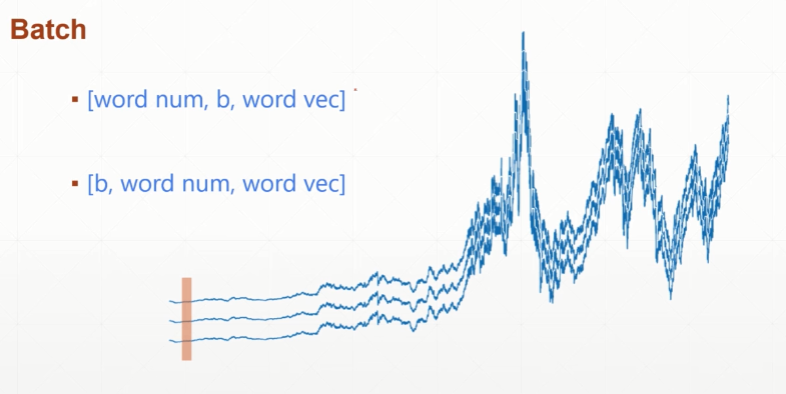

# **word2vec vs GloVe**

In [ ]:
# word2vec
word_to_idx = {"hello": 0, "world": 1}

lookup_tensor = torch.tensor([word_to_idx["hello"]], dtype=torch.long)

embeds = nn.Embedding(2, 5) # 2 words in vocab, 5 dimensional embeddings
hello_embed = embeds(lookup_tensor)
print(hello_embed)


tensor([[ 0.3101, -1.1699,  0.7812,  1.2127,  0.7350]],
       grad_fn=<EmbeddingBackward>)


In [ ]:
# GloVe
from torchnlp.word_to_vector import GloVe
vectors = GloVe()
vectors['hello']

glove.840B.300d.zip:  37%|███▋      | 797M/2.18G [05:57<10:17, 2.23MB/s]


KeyboardInterrupt: ignored

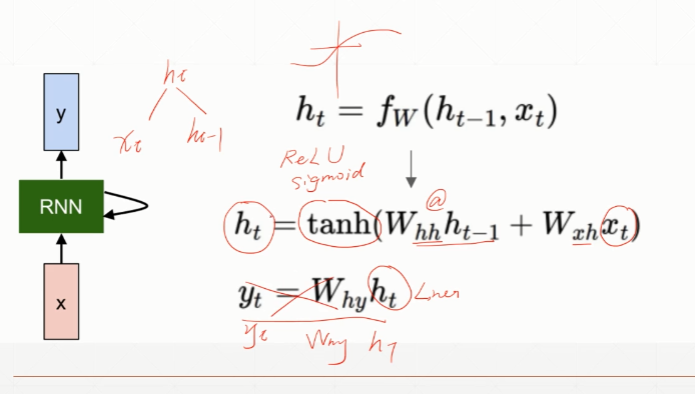

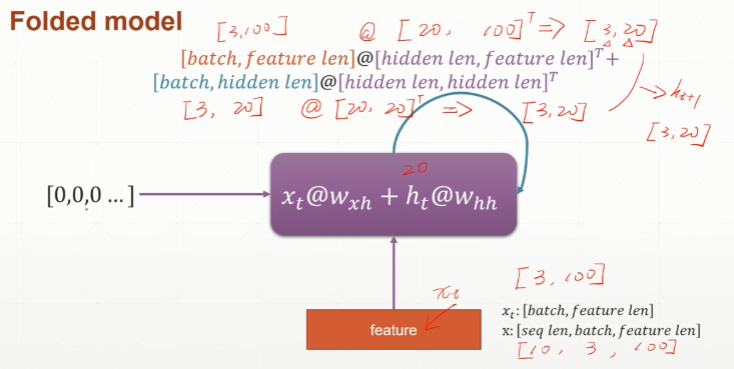

In [ ]:
rnn = nn.RNN(100, 10)
print(rnn._parameters.keys())
print(rnn.weight_hh_l0.shape, rnn.weight_ih_l0.shape)
print(rnn.bias_hh_l0.shape, rnn.bias_ih_l0.shape)

odict_keys(['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0'])
torch.Size([10, 10]) torch.Size([10, 100])
torch.Size([10]) torch.Size([10])


nn.RNN(input_size, hidden_size, num_layers(default=1))


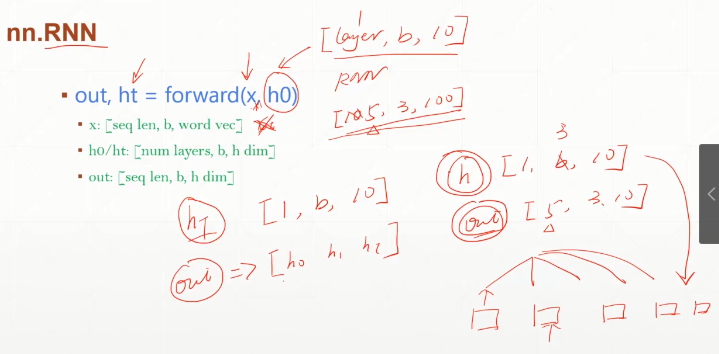

In [ ]:
rnn = nn.RNN(input_size=100, hidden_size=20, num_layers=1)
print(rnn)
x = torch.rand(10, 3, 100)
out, h = rnn(x, torch.zeros(1, 3, 20))
print(out.shape, h.shape)

RNN(100, 20)
torch.Size([10, 3, 20]) torch.Size([1, 3, 20])


In [ ]:
# 2 layer RNN
rnn = nn.RNN(100, 10, num_layers=2)
print(rnn._parameters.keys())
print(rnn.weight_hh_l0.shape, rnn.weight_ih_l0.shape)
print(rnn.weight_hh_l1.shape, rnn.weight_ih_l1.shape)

odict_keys(['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0', 'weight_ih_l1', 'weight_hh_l1', 'bias_ih_l1', 'bias_hh_l1'])
torch.Size([10, 10]) torch.Size([10, 100])
torch.Size([10, 10]) torch.Size([10, 10])


In [ ]:
# [T, b, h_dim],[layers, b, h_dim]
rnn = nn.RNN(input_size=100, hidden_size=20, num_layers=4)
print(rnn)
x = torch.randn(10, 3, 100)
out, h = rnn(x)  # h0=[4, 3, 20]
print(out.shape, h.shape)

RNN(100, 20, num_layers=4)
torch.Size([10, 3, 20]) torch.Size([4, 3, 20])


nn.RNNCell(input_size, hidden_size, num_layers(default=1))

ht = rnncell(xt,ht_1)


> xt:[b, word vec]

> ht_1/ht:[num_layers, b, h dim]

> out = torch.stack([h1, h2, ..., ht])


In [ ]:
cell1 = nn.RNNCell(100, 20)
h1 = torch.zeros(3, 20)
for xt in x:
  h1 = cell1(xt, h1)
print(h1.shape)

torch.Size([3, 20])


In [ ]:
# 2 layer
cell1 = nn.RNNCell(100, 30)
cell2 = nn.RNNCell(30, 20)
h1 = torch.zeros(3, 30)
h2 = torch.zeros(3, 20)
for xt in x:
  h1 = cell1(xt, h1)
  h2 = cell2(h1, h2)

print(h2.shape)

torch.Size([3, 20])


# 时间序列预测实战

In [ ]:
start = np.random.randint(3, size=1)[0]
num_time_steps = 50
time_steps = np.linspace(start, start + 10, num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps, 1)
x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)
y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)

In [ ]:
class Net(nn.Module):
  def __init__(self, ):
    super(Net, self).__init__()
    self.rnn = nn.RNN(
        input_size=input_size,
        hidden_size=hidden_size,
        num_layers=1,
        batch_first=True
    )
    self.linear = nn.Linear(hidden_size, output_size)

  def forward(self, x, hidden_prev):
    out, hidden_prev = self.rnn(x, hidden_prev)
    # [1, seq, h]=>[seq, h]
    out = out.view(-1, hidden_size)
    out = self.Linear(out) # [seq, h]=>[seq, 1]
    out = out.unsqueeze(dim=0) # =>[1, seq, 1]
    return out, hidden_prev


时间序列预测实战请看078rnn_sequence.py

In [ ]:
# 解决梯度爆炸Gradient Clipping
loss = criterion(output, y)
model.zero_grad()
loss.backward())
for p in model.parameters():
  print(p.grad.norm())

torch.nn.utils.clip_grad_norm_(p, 10)  # 约束w.grad到<10
optimizer.step()

# 解决梯度弥散Gradient Vanishing：1997 LSTM

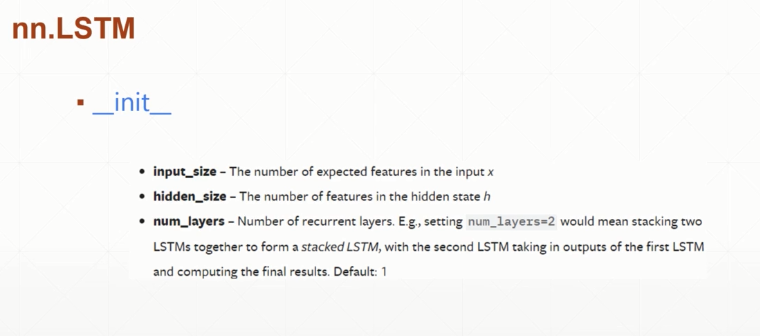

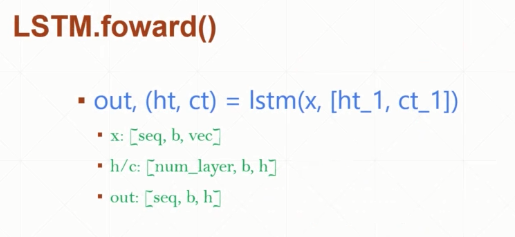

In [ ]:
lstm = nn.LSTM(input_size=100, hidden_size=20, num_layers=4)
print(lstm)
x = torch.randn(10, 3, 100) # 3个句子每个句子有10个单词，encoding为100维向量
out, (h, c) = lstm(x)
print(out.shape, h.shape, c.shape)

LSTM(100, 20, num_layers=4)
torch.Size([10, 3, 20]) torch.Size([4, 3, 20]) torch.Size([4, 3, 20])


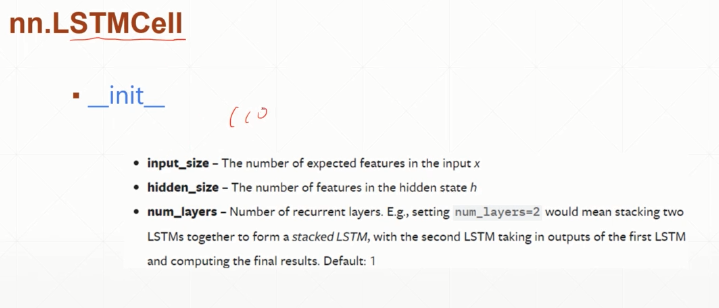

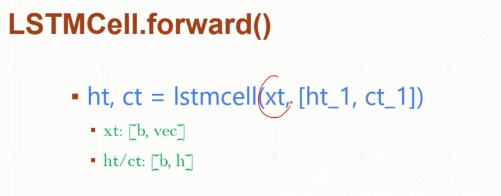

In [ ]:
# single layer
print('one layer lstm')
cell = nn.LSTMCell(input_size=100, hidden_size=20)
h = torch.zeros(3, 20)
c = torch.zeros(3, 20)
for xt in x:
  h, c = cell(xt, [h, c])
print(h.shape, c.shape)


one layer lstm
torch.Size([3, 20]) torch.Size([3, 20])


In [ ]:
# two layers
print('two layer lstm')
cell1 = nn.LSTMCell(input_size=100, hidden_size=30)
cell2 = nn.LSTMCell(input_size=30, hidden_size=20)
h1 = torch.zeros(3, 30)
c1 = torch.zeros(3, 30)
h2 = torch.zeros(3, 20)
c2 = torch.zeros(3, 20)
for xt in x:
  h1, c1 = cell1(xt, [h1, c1])
  h2, c2 = cell2(h1, [h2, c2])
print(h2.shape, c2.shape)

two layer lstm
torch.Size([3, 20]) torch.Size([3, 20])


In [ ]:
!pip install torchtext
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
import torch
from torch import nn, optim
from torchtext import data, datasets

print('GPU:', torch.cuda.is_available())

torch.manual_seed(123)

GPU: True


In [ ]:
# Load Dataset
TEXT = data.Field(tokenize='spacy')
LABEL = data.LabelField(dtype=torch.float)
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

print('len of train data:', len(train_data))
print('len of test data:', len(test_data))

print(train_data.examples[15].text)
print(train_data.examples[15].label)

TEXT.build_vocab(train_data, max_size=10000, vectors='glove.6B.100d')
LABEL.build_vocab(train_data)


batchsz = 30
device = torch.device('cuda')
train_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, test_data),
    batch_size = batchsz,
    device=device
)

len of train data: 25000
len of test data: 25000
['This', 'is', 'my', 'first', 'comment', 'on', 'IMDb', 'website', ',', 'and', 'the', 'reason', 'I', "'m", 'writing', 'it', 'is', 'that', 'we', "'re", 'talking', 'about', 'ONE', 'OF', 'THE', 'BEST', 'FILMS', 'EVER', '!', "'", 'Ne', 'goryuy', '!', "'", 'will', 'make', 'you', 'laugh', 'and', 'cry', 'at', 'the', 'same', 'time', ',', 'you', 'will', 'fall', 'in', 'love', '(', 'if', 'you', "'re", 'not', 'a', 'fan', 'yet', '!', ')', 'with', 'Georgian', 'choir', 'singing', 'tradition', ',', 'and', 'possibly', 'you', 'will', 'accept', 'the', 'hardships', 'of', 'your', 'own', 'existence', 'and', 'just', 'feel', 'good', 'after', 'watching', 'it', ':', ')', 'What', 'I', 'like', 'a', 'lot', 'about', 'this', 'film', 'is', 'that', 'actors', 'in', 'the', 'non', '-', 'leading', 'roles', 'create', 'vivid', 'and', 'memorable', 'characters', 'and', 'are', 'just', 'as', 'interesting', 'and', 'important', 'as', 'the', 'central', 'character', '.', 'The', 'film'

.vector_cache/glove.6B.zip: 862MB [06:26, 2.23MB/s]                           
100%|█████████▉| 399937/400000 [00:17<00:00, 23087.10it/s]

In [ ]:
# Network
class RNN(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        """
        """
        super(RNN, self).__init__()
        
        # [0-10001] => [100]
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # [100] => [256]
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=2, 
                           bidirectional=True, dropout=0.5)
        # [256*2] => [1]
        self.fc = nn.Linear(hidden_dim*2, 1)
        self.dropout = nn.Dropout(0.5)
        
        
    def forward(self, x):
        """
        x: [seq_len, b] vs [b, 3, 28, 28]
        """
        # [seq, b, 1] => [seq, b, 100]
        embedding = self.dropout(self.embedding(x))
        
        # output: [seq, b, hid_dim*2]
        # hidden/h: [num_layers*2, b, hid_dim]
        # cell/c: [num_layers*2, b, hid_di]
        output, (hidden, cell) = self.rnn(embedding)
        
        # [num_layers*2, b, hid_dim] => 2 of [b, hid_dim] => [b, hid_dim*2]
        hidden = torch.cat([hidden[-2], hidden[-1]], dim=1)
        
        # [b, hid_dim*2] => [b, 1]
        hidden = self.dropout(hidden)
        out = self.fc(hidden)
        
        return out


In [ ]:
# Load word embedding
rnn = RNN(len(TEXT.vocab), 100, 256)

pretrained_embedding = TEXT.vocab.vectors
print('pretrained_embedding:', pretrained_embedding.shape)
rnn.embedding.weight.data.copy_(pretrained_embedding)
print('embedding layer inited.')

optimizer = optim.Adam(rnn.parameters(), lr=1e-3)
criteon = nn.BCEWithLogitsLoss().to(device)
rnn.to(device)

pretrained_embedding: torch.Size([10002, 100])
embedding layer inited.


RNN(
  (embedding): Embedding(10002, 100)
  (rnn): LSTM(100, 256, num_layers=2, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
# train
import numpy as np

def binary_acc(preds, y):
    """
    get accuracy
    """
    preds = torch.round(torch.sigmoid(preds))
    correct = torch.eq(preds, y).float()
    acc = correct.sum() / len(correct)
    return acc

def train(rnn, iterator, optimizer, criteon):
    
    avg_acc = []
    rnn.train()
    
    for i, batch in enumerate(iterator):
        
        # [seq, b] => [b, 1] => [b]
        pred = rnn(batch.text).squeeze(1)
        # 
        loss = criteon(pred, batch.label)
        acc = binary_acc(pred, batch.label).item()
        avg_acc.append(acc)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i%10 == 0:
            print(i, acc)
        
    avg_acc = np.array(avg_acc).mean()
    print('avg acc:', avg_acc)

In [ ]:
# test
def eval(rnn, iterator, criteon):
    
    avg_acc = []
    
    rnn.eval()
    
    with torch.no_grad():
        for batch in iterator:

            # [b, 1] => [b]
            pred = rnn(batch.text).squeeze(1)

            #
            loss = criteon(pred, batch.label)

            acc = binary_acc(pred, batch.label).item()
            avg_acc.append(acc)
        
    avg_acc = np.array(avg_acc).mean()
    
    print('>>test:', avg_acc)



In [ ]:
for epoch in range(10):
    
    eval(rnn, test_iterator, criteon)
    train(rnn, train_iterator, optimizer, criteon)

>>test: 0.499760213622944
0 0.6333333849906921
10 0.36666667461395264
20 0.5333333611488342
30 0.36666667461395264
40 0.30000001192092896
50 0.5333333611488342
60 0.4333333671092987
70 0.36666667461395264
80 0.6333333849906921
90 0.5666667222976685
100 0.4333333671092987
110 0.6000000238418579
120 0.46666669845581055
130 0.6333333849906921
140 0.6000000238418579
150 0.4333333671092987
160 0.6333333849906921
170 0.5333333611488342
180 0.6666666865348816
190 0.6666666865348816
200 0.6666666865348816
210 0.5666667222976685
220 0.5
230 0.6000000238418579
240 0.6000000238418579
250 0.7666667103767395
260 0.6666666865348816
270 0.6333333849906921
280 0.6000000238418579
290 0.6000000238418579
300 0.7333333492279053
310 0.6333333849906921
320 0.5
330 0.7333333492279053
340 0.7333333492279053
350 0.6000000238418579
360 0.6000000238418579
370 0.5333333611488342
380 0.5666667222976685
390 0.7333333492279053
400 0.7666667103767395
410 0.30000001192092896
420 0.46666669845581055
430 0.4333333671092

##End!!!